# Load results

In [1]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt
from pathlib import Path

pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_columns', 999)
# pd.set_option('display.max_rows', 999)

def load_results(walk_path: str):
    df_aggregate = pd.DataFrame(columns=['metric', 'val_prec', 'val_recall', 'val_f1', 'test_prec', 'test_recall', 'test_f1', 'seed'])
    for root, dirs, files in os.walk(walk_path):
        for F in files:
            filename = os.path.join(root, F)
            if filename.endswith('config.json'):
                filename_config = filename
                flags = filename.split('/')
                
                df = pd.read_json(filename_config)
                params = json.load(open(filename.replace('config.json', 'test_results_benchmark.json')))['learnable params']
                df = df.drop(['config'], axis = 1)
                df = df.dropna()
                df = df.reset_index()
                df = df.rename(columns={'index': 'metric'})

                df['val_prec'] = df['val_results'].apply(lambda x: x['P'])
                df['val_recall'] = df['val_results'].apply(lambda x: x['R'])
                df['val_f1'] = df['val_results'].apply(lambda x: x['F1'])
                df['test_prec'] = df['test_results'].apply(lambda x: x['P'])
                df['test_recall'] = df['test_results'].apply(lambda x: x['R'])
                df['test_f1'] = df['test_results'].apply(lambda x: x['F1'])
                df['name'] = flags[24].split('_')[0]
                df['params'] = round(params / 1e6, 2)
                df['freeze_enc'] = 'FT' if flags[8].split('_')[-1] == '0' else 'frozen'
                df['lora'] = 'LoRA' if flags[22].split('_')[-1] == '1' else '/'
                df['tag_emb'] = flags[13].split('_')[-1]
                df['tag_rnn'] = flags[14].split('_')[-1]
                df['par_rnn'] = flags[15].split('_')[3].upper() if flags[15].split('_')[3] != 'none' else '/'
                df['par_rnn_l'] = flags[15].split('_')[-2][-1]
                par_rnn_h = flags[15].split('_')[-1][1:]
                df['par_rnn_h'] = par_rnn_h if par_rnn_h != 'none' else '0'
                df['data'] = flags[18].split('=')[-1]
                df['par_type'] = flags[19].split('_')[2]
                df['par_gnn_layers'] = flags[19].split('_')[3]
                df['mlp_h'] = flags[19].split('_')[-1]
                df['arc_norm'] = flags[20].split('_')[-1]
                df['par_res'] = flags[21].split('_')[-1]
                
                df['seed'] = flags[-2].split('_')[-1]
                # df['filename'] = filename
                df = df.drop(['val_results', 'test_results'], axis = 1)
                
                df_aggregate = pd.concat([df_aggregate, df])
    print(flags)
    print(df_aggregate.columns)
    return df_aggregate

# LSTM ablations no tagger rnn

In [ ]:
import pandas as pd

walk_path = '/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_lstm_size_ablations'
df_no_tagger = load_results(walk_path)

df_no_tagger.drop_duplicates()

df_no_tagger = df_no_tagger[df_no_tagger['metric'] == 'parser_labeled_results']
# df_no_tagger = df_no_tagger[df_no_tagger['tag_emb'] == '0']
# df_no_tagger = df_no_tagger[df_no_tagger['mlp_h'] == '500']
# df_no_tagger = df_no_tagger[df_no_tagger['par_rnn_l'] == '2']
# df_no_tagger = df_no_tagger[df_no_tagger['seed'] == '1']
# df_no_tagger = df_no_tagger[df_no_tagger['data'] == 'yamakata']

display(df_no_tagger)
dataset_list = df_no_tagger['data'].unique()

In [ ]:
print(df_no_tagger['seed'].value_counts())
print(df_no_tagger['par_rnn_l'].value_counts())
print(df_no_tagger['par_rnn_h'].value_counts())

# LSTM ablations w/ tagger rnn

In [2]:
import pandas as pd

walk_path = '/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_tagger'
df_tagger_load = load_results(walk_path).drop_duplicates()

df_tagger = df_tagger_load
df_tagger = df_tagger[df_tagger['metric'] == 'parser_labeled_results']
df_tagger = df_tagger[df_tagger['tag_rnn'] == '1']
# df_tagger = df_tagger[df_tagger['tag_emb'] == '0']
# df_tagger = df_tagger[df_tagger['mlp_h'] == '500']
# df_tagger = df_tagger[df_tagger['par_rnn_l'] == '2']
# df_tagger = df_tagger[df_tagger['seed'] == '1']
# df_tagger = df_tagger[df_tagger['data'] == 'yamakata']

display(df_tagger)
dataset_list = df_tagger['data'].unique()

/tmp/ipykernel_2688065/88324261.py:54: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_aggregate = pd.concat([df_aggregate, df])


['', 'home', 'pgajo', 'projects', 'def-hsajjad', 'pgajo', 'Multitask-RFG-torch', 'results_tagger', 'freeze_encoder_1', 'arc_predattn', 'stepmask_0', 'gnn_0', 'bpos_1', 'tagemb_1', 'tagger_rnn_1', 'parser_rnn_1_lstm_l1_h300', 'laplacian_pe_', 'use_abs_step_embeddings_0', 'data=conll04', 'parser_type_simple_0_mlp_500', 'arc_norm_0', 'parser_residual_0', 'use_lora_0', 'aug_000_none_keep_111_k_0-0-0_2000', 'bert-base-uncased_2025-04-27--12:00:32_seed_1', 'config.json']
Index(['metric', 'val_prec', 'val_recall', 'val_f1', 'test_prec',
       'test_recall', 'test_f1', 'seed', 'name', 'params', 'freeze_enc',
       'lora', 'tag_emb', 'tag_rnn', 'par_rnn', 'par_rnn_l', 'par_rnn_h',
       'data', 'par_type', 'par_gnn_layers', 'mlp_h', 'arc_norm', 'par_res'],
      dtype='object')


,metric,val_prec,val_recall,val_f1,test_prec,test_recall,test_f1,seed,name,params,freeze_enc,lora,tag_emb,tag_rnn,par_rnn,par_rnn_l,par_rnn_h,data,par_type,par_gnn_layers,mlp_h,arc_norm,par_res
1,parser_labeled_results,0.2965,0.2120,0.2472,0.3261,0.2358,0.2737,0,bert-base-uncased,3.93,frozen,/,0,1,LSTM,2,200,scierc,simple,0,300,1,0
1,parser_labeled_results,0.3070,0.2530,0.2774,0.3499,0.2737,0.3072,1,bert-base-uncased,3.93,frozen,/,0,1,LSTM,2,200,scierc,simple,0,300,1,0
1,parser_labeled_results,0.2546,0.2200,0.2361,0.2882,0.2307,0.2562,0,bert-base-uncased,3.93,frozen,/,0,1,LSTM,2,200,scierc,simple,0,300,0,0
1,parser_labeled_results,0.3415,0.1940,0.2474,0.3806,0.1964,0.2591,1,bert-base-uncased,3.93,frozen,/,0,1,LSTM,2,200,scierc,simple,0,300,0,0
1,parser_labeled_results,0.2719,0.2360,0.2527,0.3282,0.2547,0.2868,0,bert-base-uncased,3.69,frozen,/,0,1,LSTM,2,200,scierc,simple,0,100,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,parser_labeled_results,0.5976,0.5450,0.5701,0.6047,0.5830,0.5936,0,bert-base-uncased,4.04,frozen,/,1,1,LSTM,1,300,conll04,simple,0,100,0,0
1,parser_labeled_results,0.5743,0.5670,0.5706,0.5755,0.5411,0.5578,1,bert-base-uncased,4.76,frozen,/,1,1,LSTM,1,300,conll04,simple,0,500,1,0
1,parser_labeled_results,0.6788,0.5119,0.5837,0.6685,0.5396,0.5972,0,bert-base-uncased,4.76,frozen,/,1,1,LSTM,1,300,conll04,simple,0,500,1,0
1,parser_labeled_results,0.5852,0.4917,0.5344,0.5925,0.4978,0.5410,0,bert-base-uncased,4.76,frozen,/,1,1,LSTM,1,300,conll04,simple,0,500,0,0


In [3]:
df_tagger['seed'].value_counts()

seed
0    576
1    544
Name: count, dtype: int64

In [4]:
a = 'tag_rnn'
df1 = df_tagger[(df_tagger['seed'] == '2') & (df_tagger['tag_rnn'] == '0')]# & (df_tagger['tag_emb'] == '1')]
df2 = df_tagger[(df_tagger['seed'] == '3') & (df_tagger['tag_rnn'] == '0')]# & (df_tagger['tag_emb'] == '1')]
print(df1[a].value_counts())
print(df2[a].value_counts())

Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)


In [5]:
print(df_tagger['seed'].value_counts())
print(df_tagger['par_rnn_l'].value_counts())
print(df_tagger['par_rnn_h'].value_counts())
print(df_tagger['tag_rnn'].value_counts())

seed
0    576
1    544
Name: count, dtype: int64
par_rnn_l
1    376
2    372
3    372
Name: count, dtype: int64
par_rnn_h
100    282
200    280
400    279
300    279
Name: count, dtype: int64
tag_rnn
1    1120
Name: count, dtype: int64


## Test F1 vs LSTM number of layers

In [7]:
df_filtered = df_tagger
# df_filtered = df_no_tagger
# df_filtered = df_filtered[df_filtered['tag_emb'] == '1']
df_filtered#['test_f1'].mean()

,metric,val_prec,val_recall,val_f1,test_prec,test_recall,test_f1,seed,name,params,freeze_enc,lora,tag_emb,tag_rnn,par_rnn,par_rnn_l,par_rnn_h,data,par_type,par_gnn_layers,mlp_h,arc_norm,par_res
1,parser_labeled_results,0.2965,0.2120,0.2472,0.3261,0.2358,0.2737,0,bert-base-uncased,3.93,frozen,/,0,1,LSTM,2,200,scierc,simple,0,300,1,0
1,parser_labeled_results,0.3070,0.2530,0.2774,0.3499,0.2737,0.3072,1,bert-base-uncased,3.93,frozen,/,0,1,LSTM,2,200,scierc,simple,0,300,1,0
1,parser_labeled_results,0.2546,0.2200,0.2361,0.2882,0.2307,0.2562,0,bert-base-uncased,3.93,frozen,/,0,1,LSTM,2,200,scierc,simple,0,300,0,0
1,parser_labeled_results,0.3415,0.1940,0.2474,0.3806,0.1964,0.2591,1,bert-base-uncased,3.93,frozen,/,0,1,LSTM,2,200,scierc,simple,0,300,0,0
1,parser_labeled_results,0.2719,0.2360,0.2527,0.3282,0.2547,0.2868,0,bert-base-uncased,3.69,frozen,/,0,1,LSTM,2,200,scierc,simple,0,100,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,parser_labeled_results,0.5976,0.5450,0.5701,0.6047,0.5830,0.5936,0,bert-base-uncased,4.04,frozen,/,1,1,LSTM,1,300,conll04,simple,0,100,0,0
1,parser_labeled_results,0.5743,0.5670,0.5706,0.5755,0.5411,0.5578,1,bert-base-uncased,4.76,frozen,/,1,1,LSTM,1,300,conll04,simple,0,500,1,0
1,parser_labeled_results,0.6788,0.5119,0.5837,0.6685,0.5396,0.5972,0,bert-base-uncased,4.76,frozen,/,1,1,LSTM,1,300,conll04,simple,0,500,1,0
1,parser_labeled_results,0.5852,0.4917,0.5344,0.5925,0.4978,0.5410,0,bert-base-uncased,4.76,frozen,/,1,1,LSTM,1,300,conll04,simple,0,500,0,0


In [8]:
import numpy as np

1120


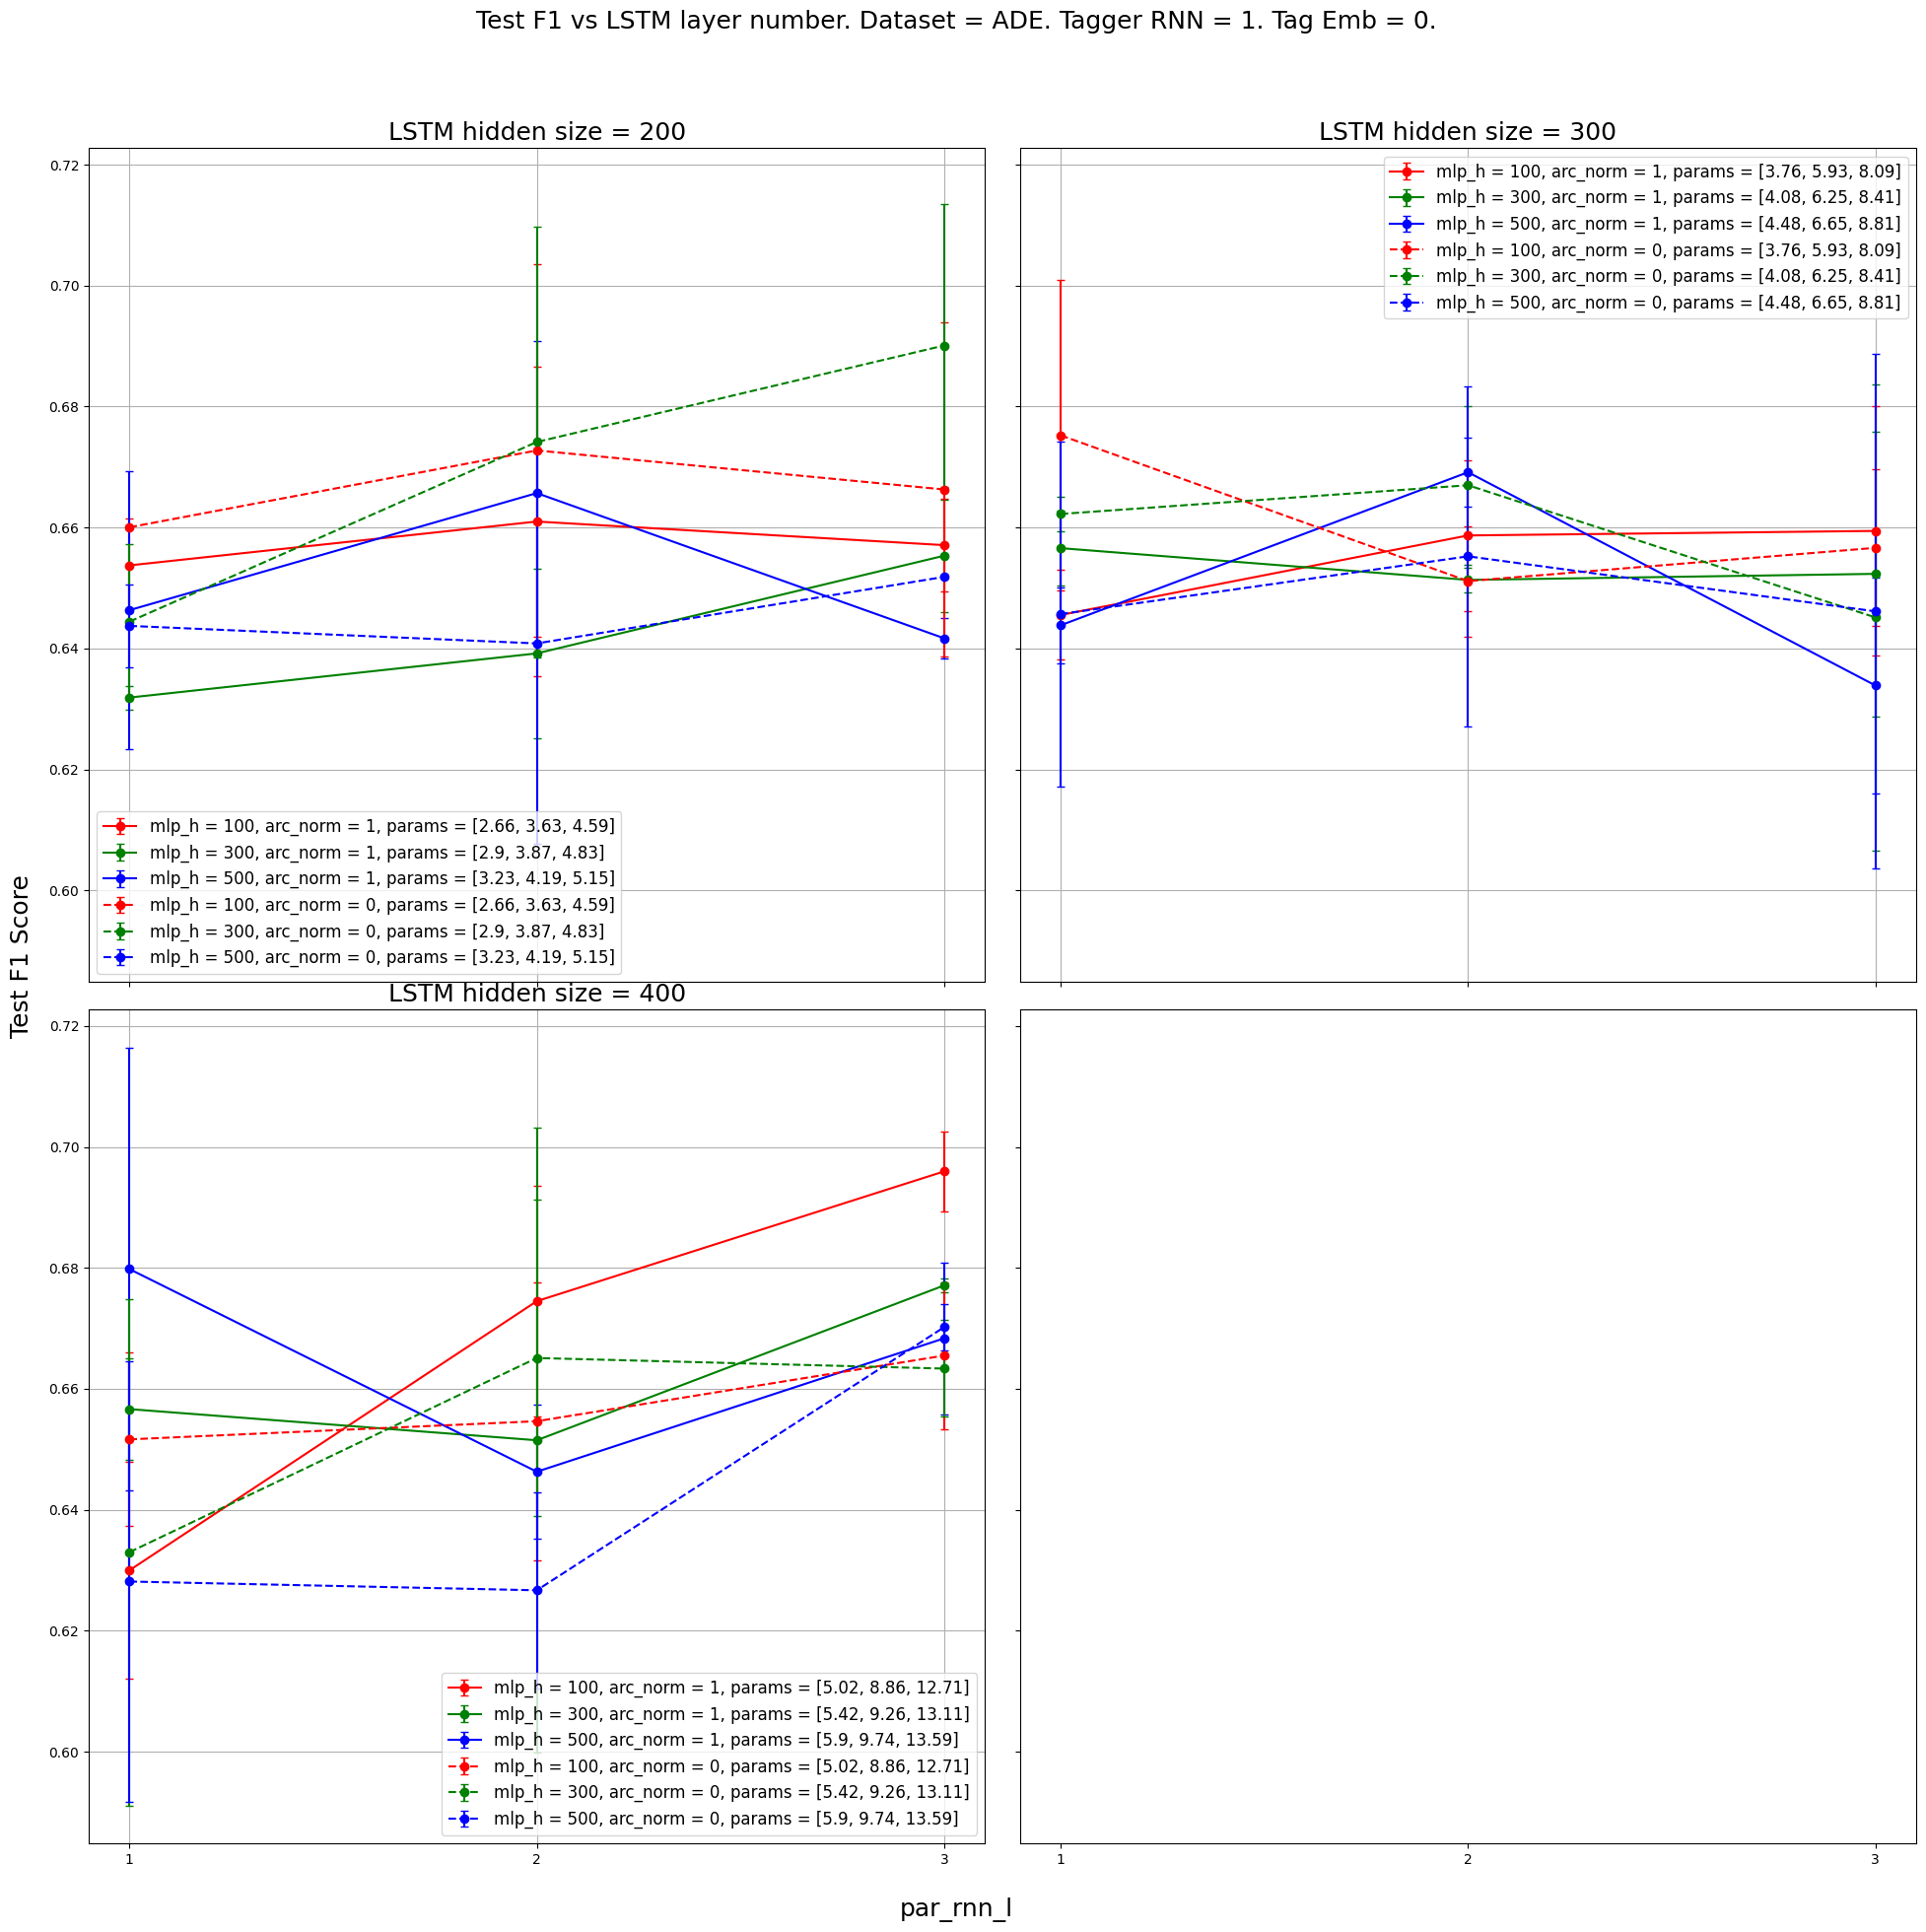

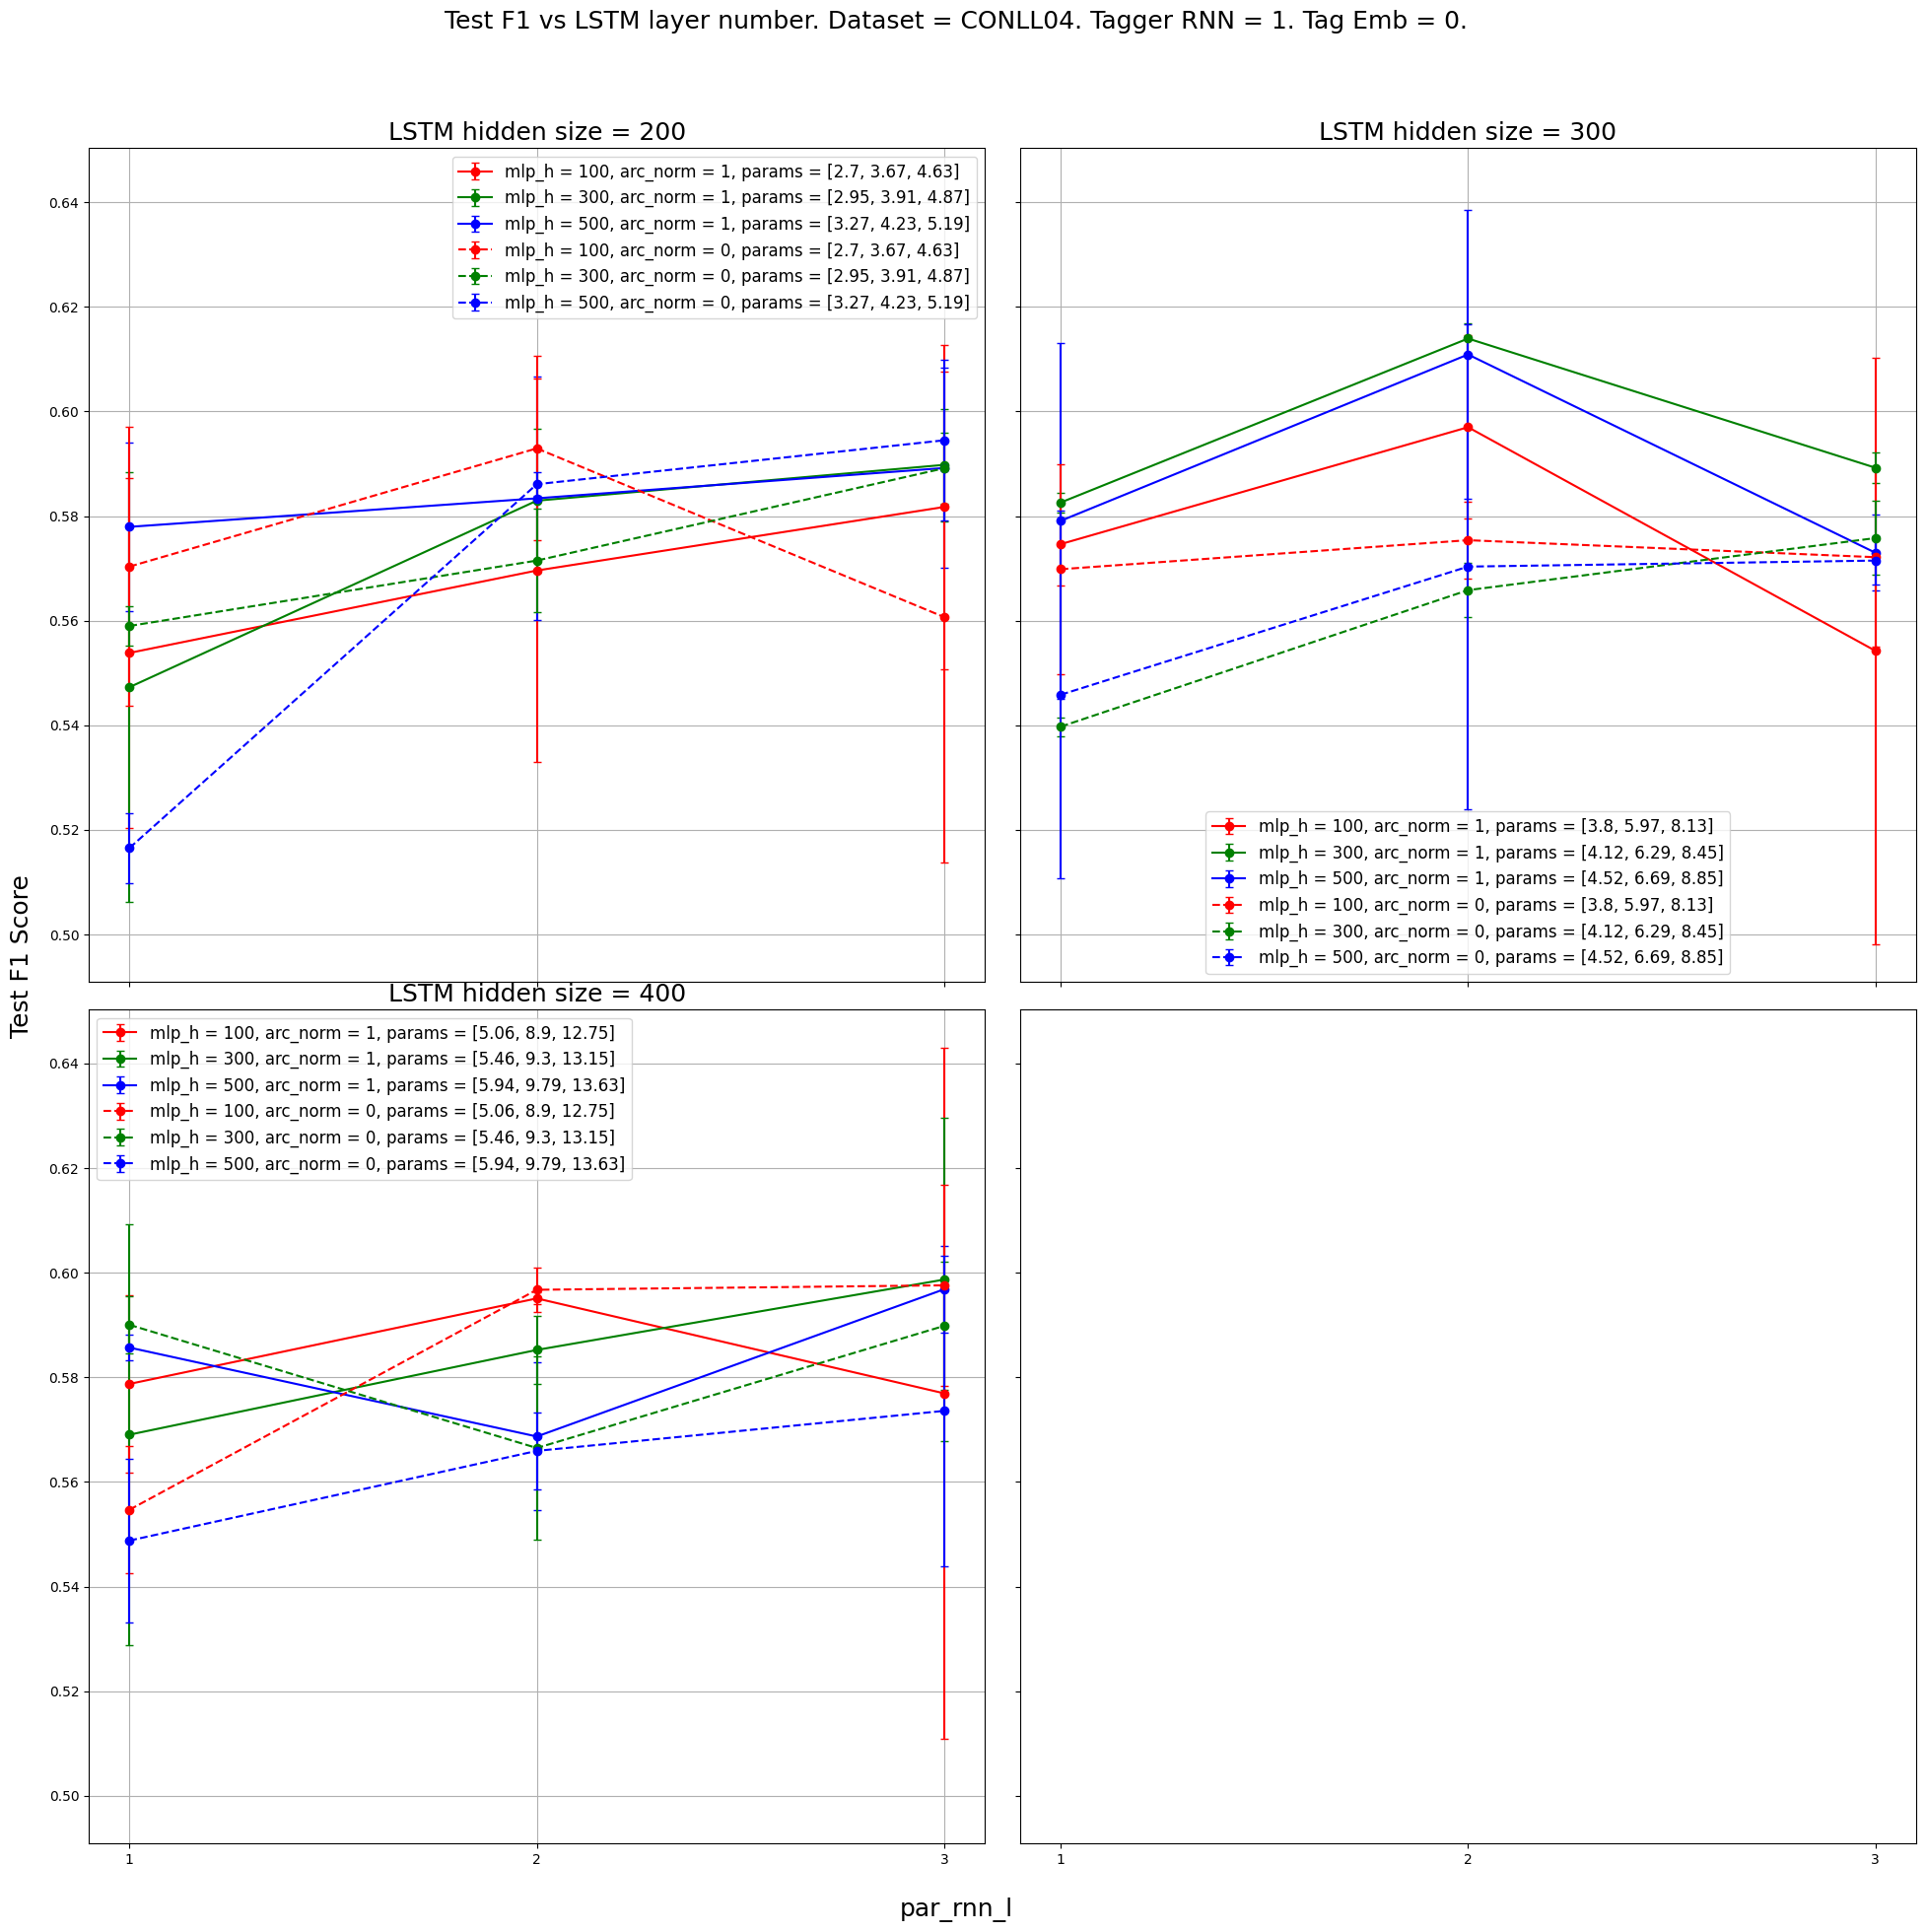

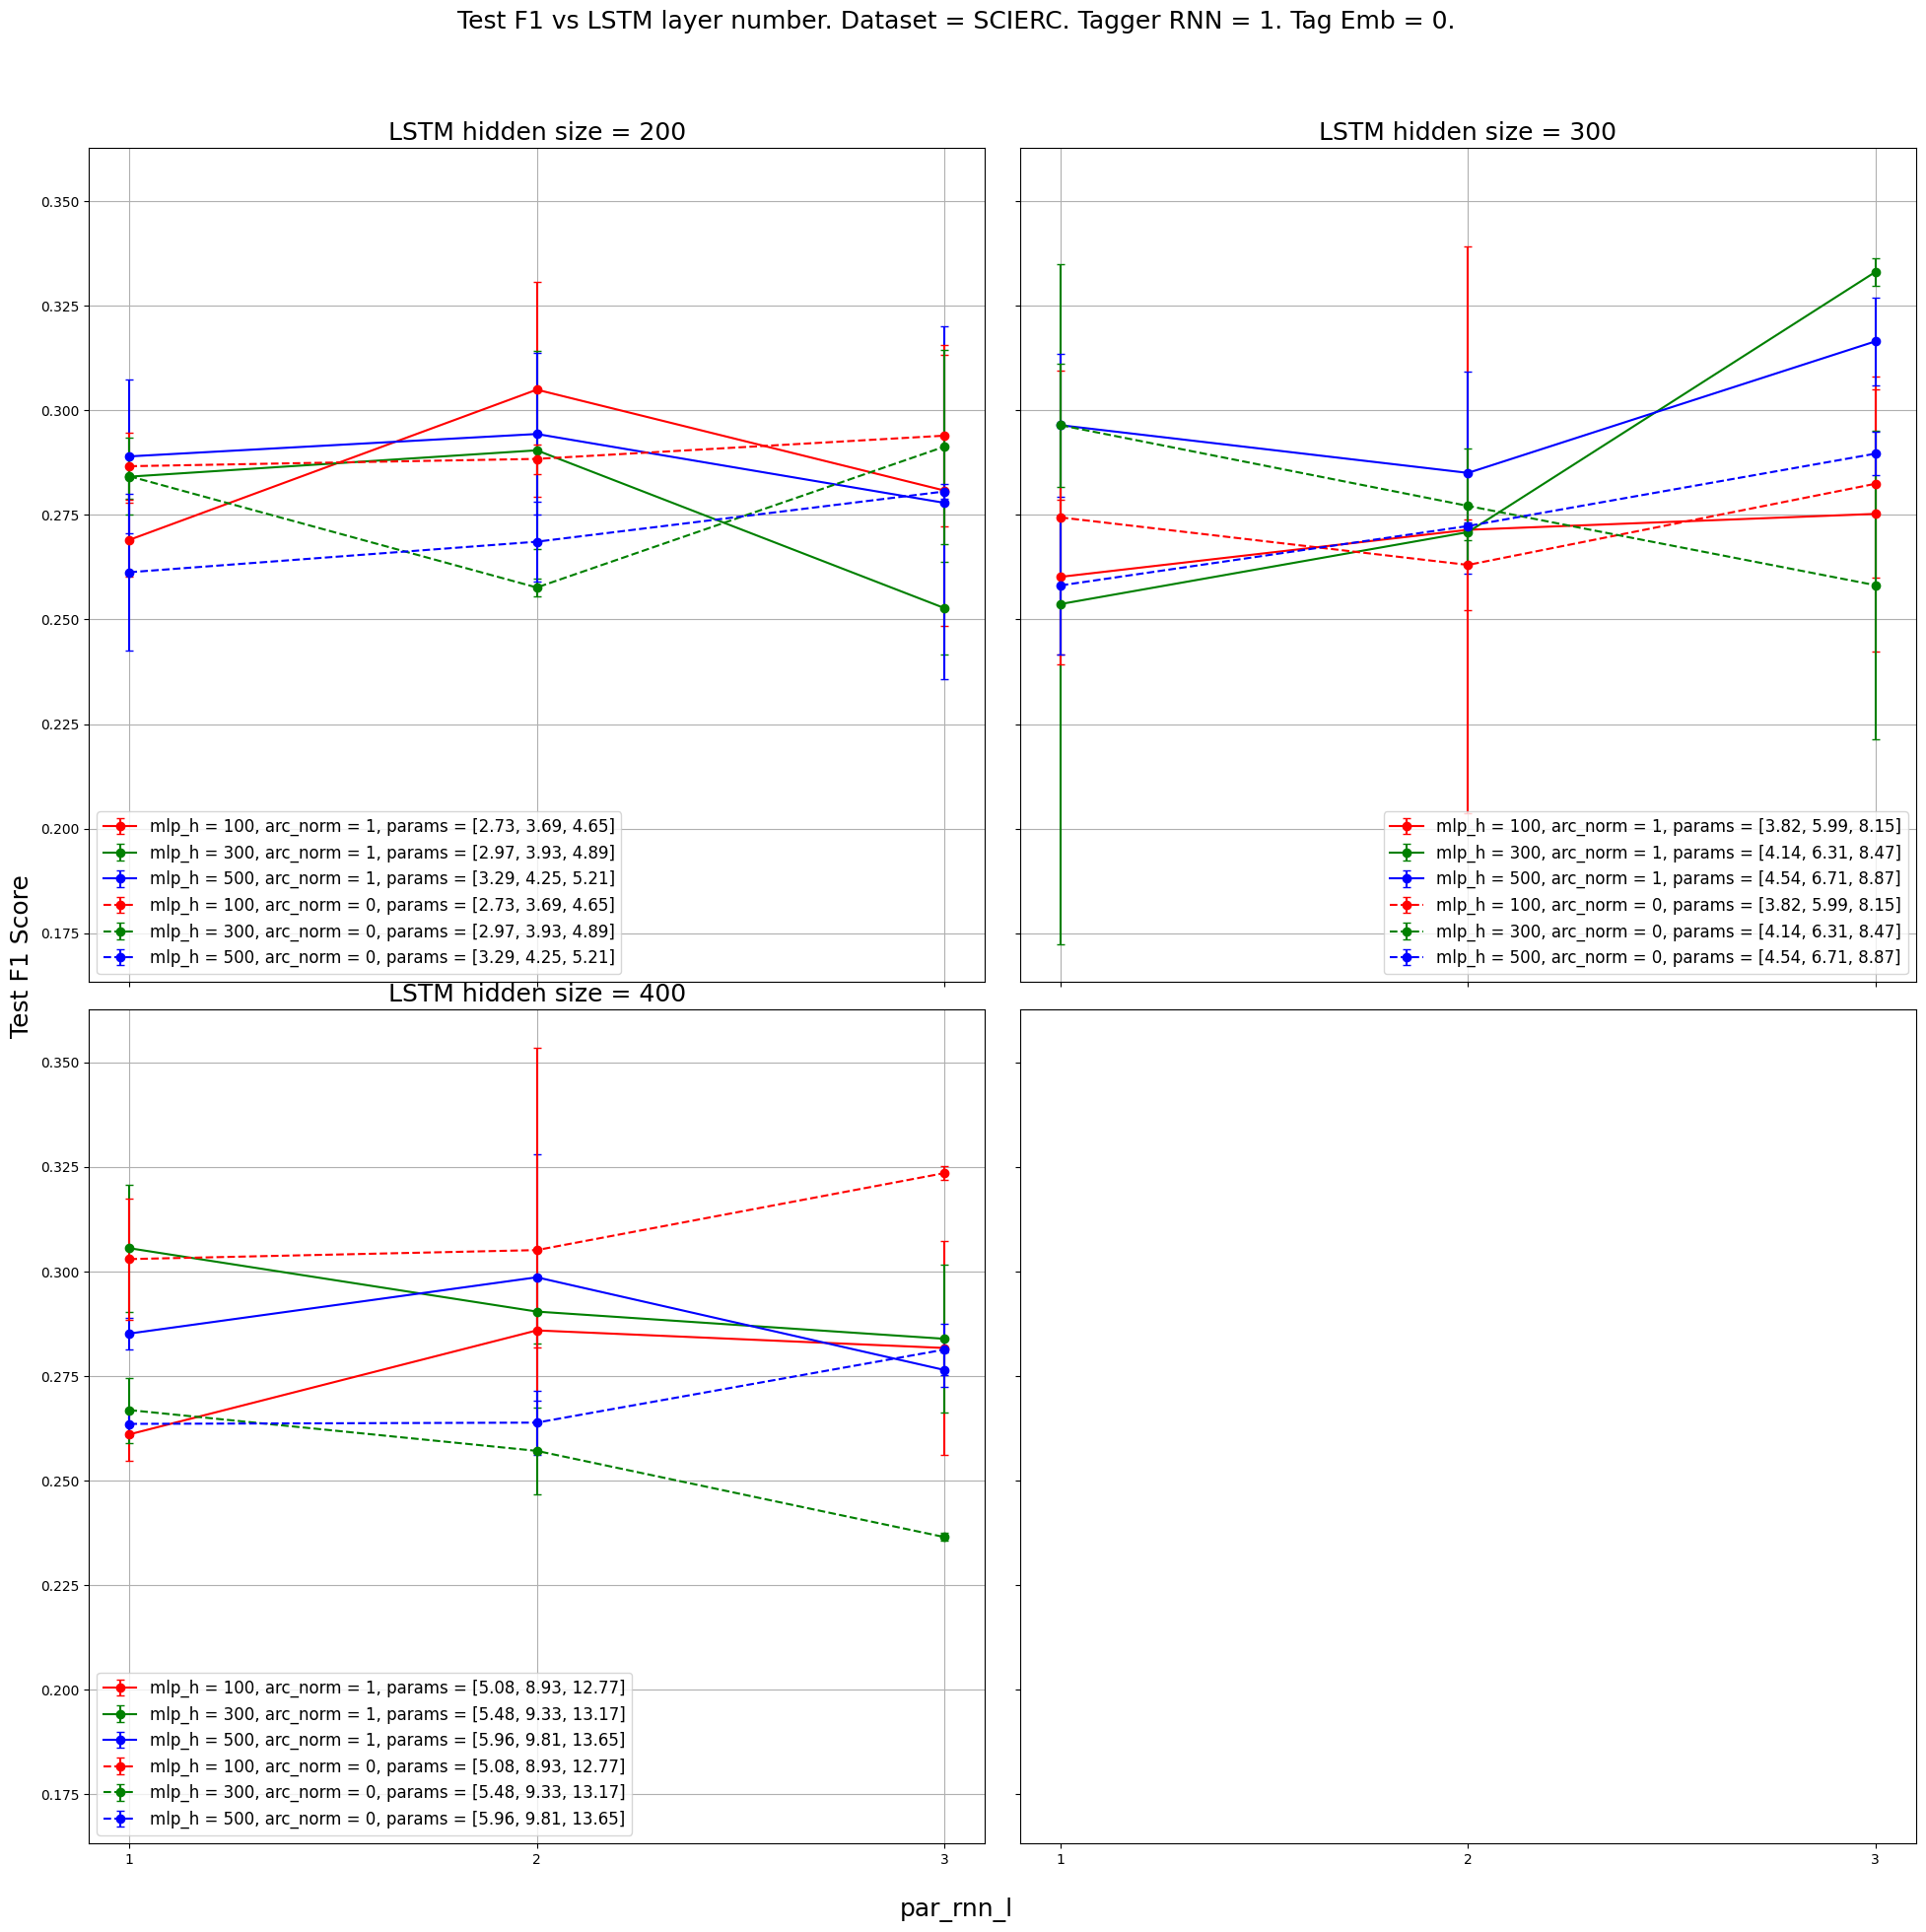

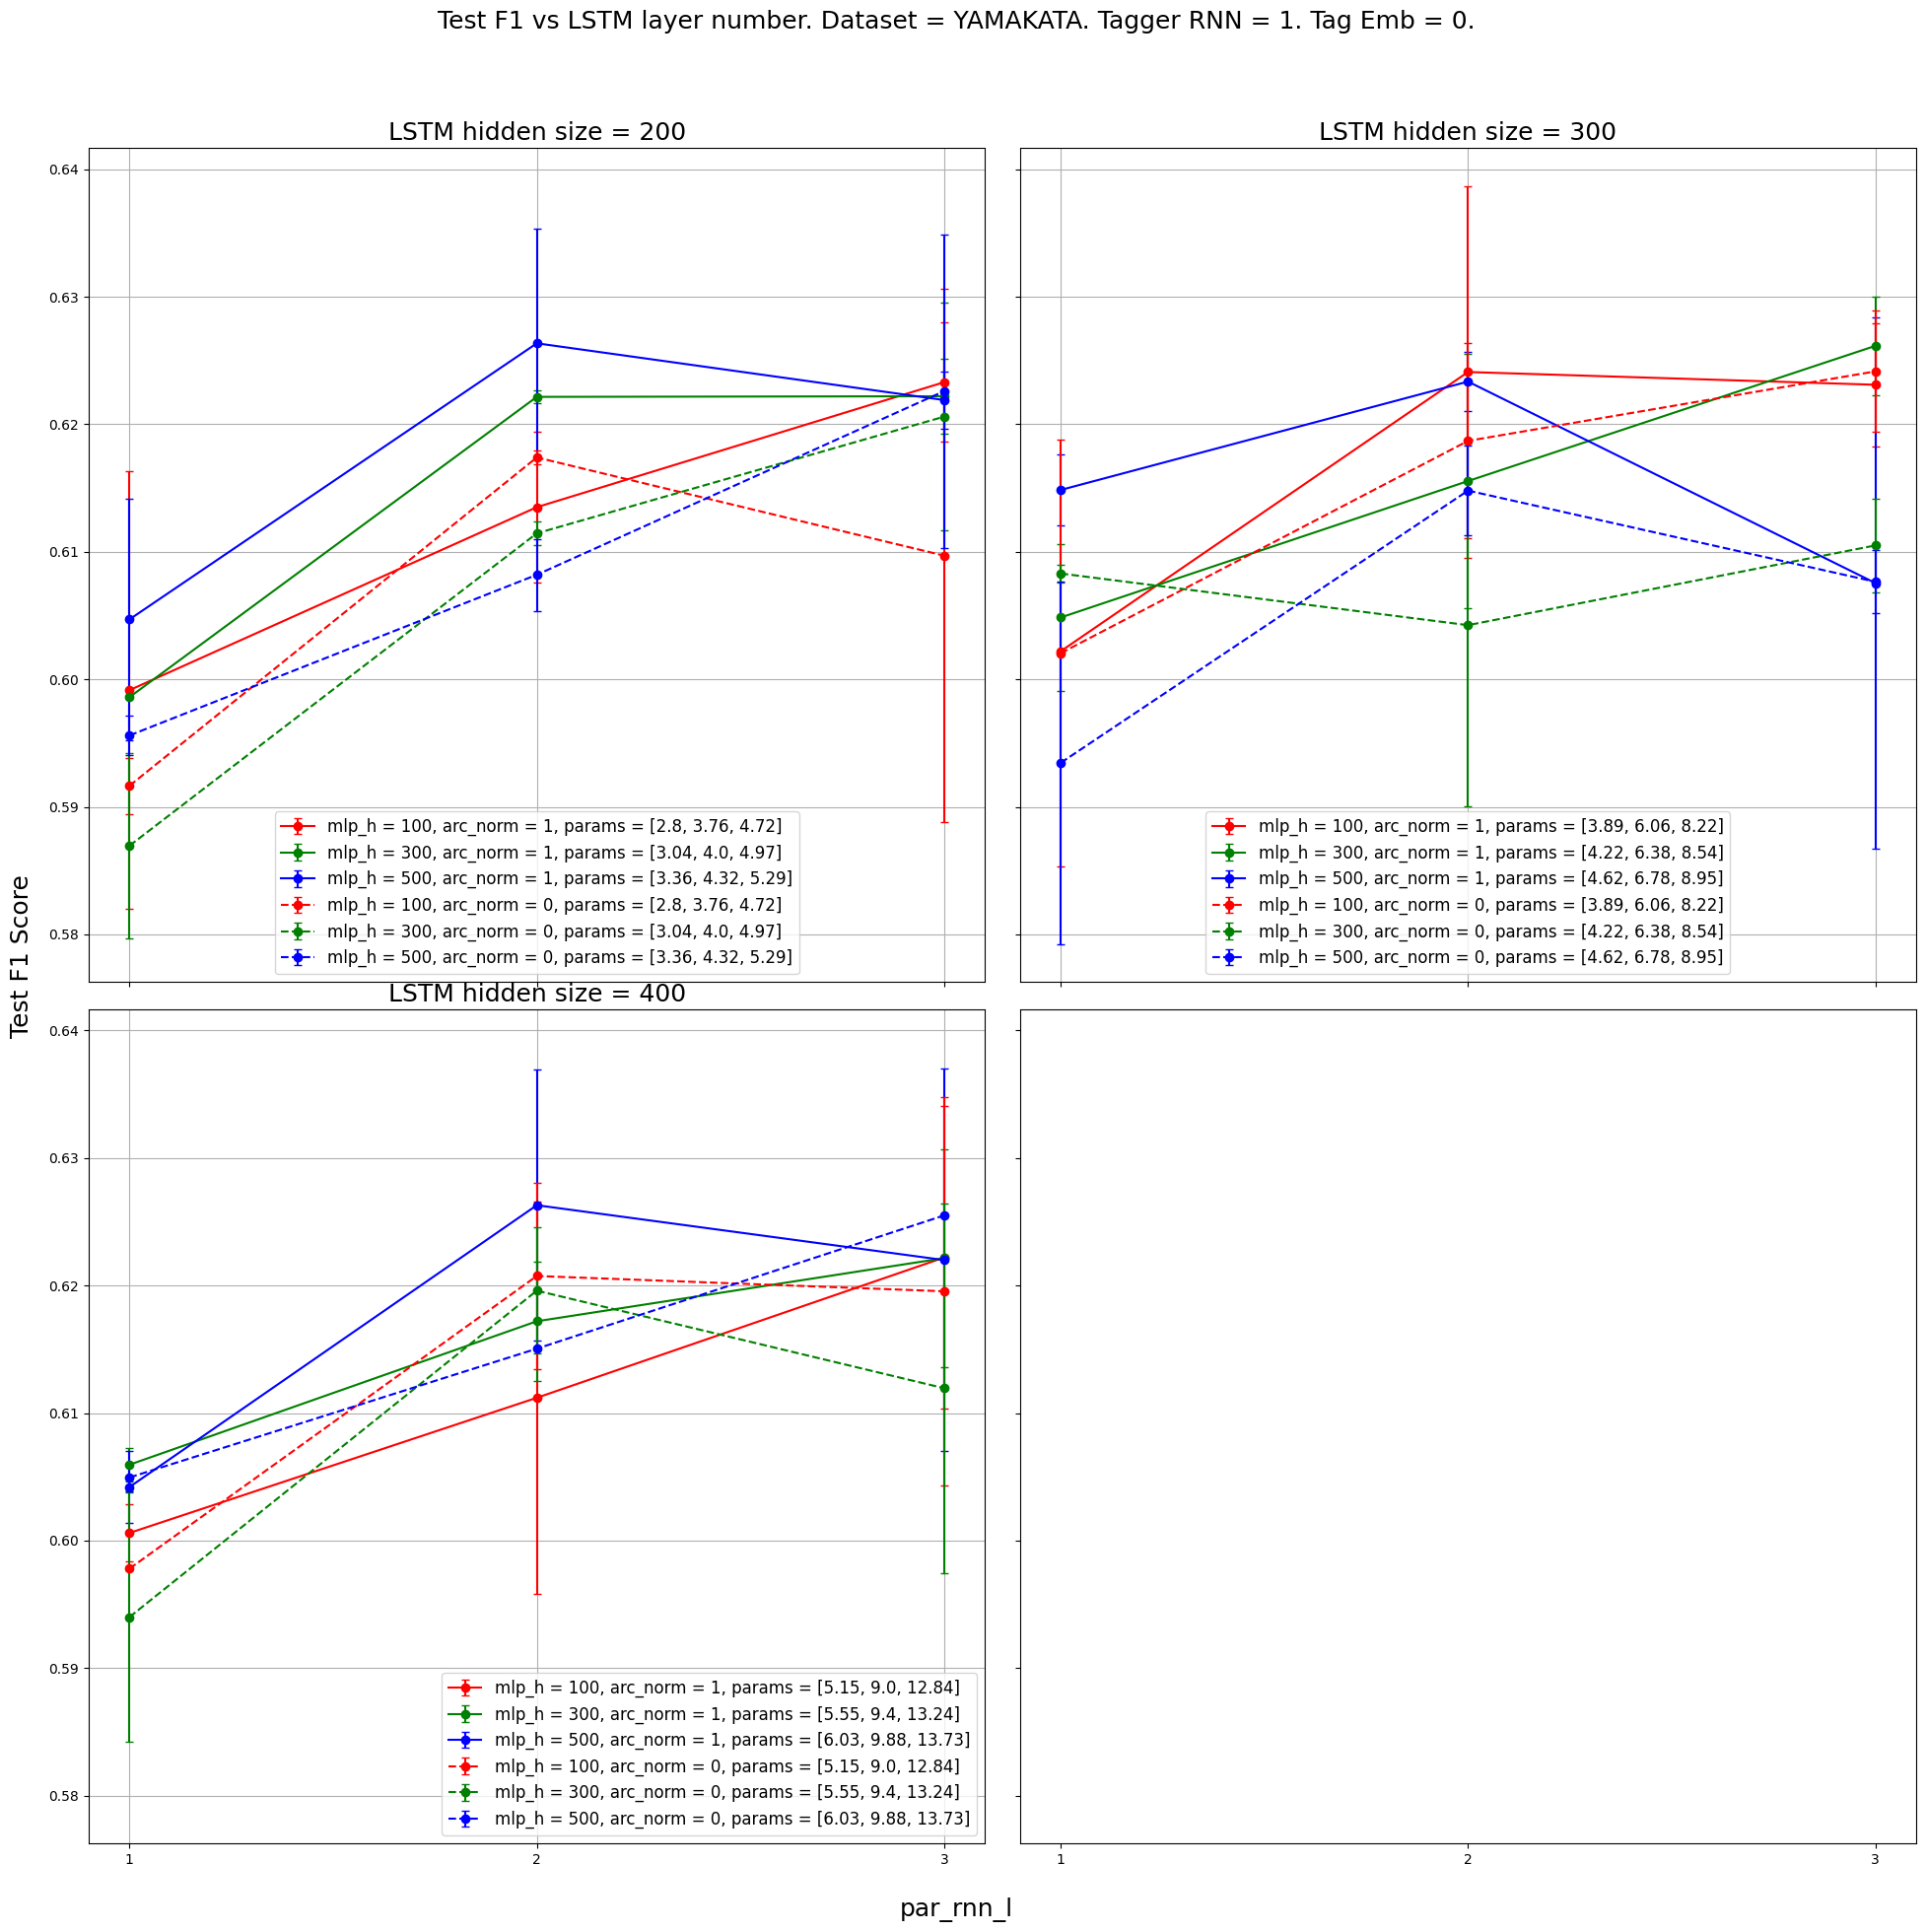

In [10]:
print(len(df_filtered))
tag_emb_options = [
    '0',
    # '1',
    ]  # sorted(df_filtered['tag_emb'].unique())
hidden_sizes = sorted(df_filtered['par_rnn_h'].unique())[1:]
df_list = [
    df_tagger,
    # df_no_tagger,
    ]
for df_filtered in df_list:
    tagger_rnn_flag = df_filtered['tag_rnn'].unique()
    for tag_emb_opt in tag_emb_options:
        df_tag_emb = df_filtered[df_filtered['tag_emb'] == tag_emb_opt]
        for dataset in sorted(dataset_list):
            df_data = df_tag_emb[df_tag_emb['data'] == dataset]
            a = 2
            b = 2
            f, axs = plt.subplots(a, b, sharex=True, sharey=True, figsize=(b * 10, a * 10))
            f.tight_layout(rect=[0, 0, 1, 0.92])
            f.suptitle(f'Test F1 vs LSTM layer number. Dataset = {dataset.upper()}. Tagger RNN = {tagger_rnn_flag[0]}. Tag Emb = {tag_emb_opt}.',
                       fontsize = 18)
            f.supxlabel('par_rnn_l', fontsize=18)       # global x-axis label
            f.supylabel('Test F1 Score', fontsize=18)   # global y-axis label
            f.subplots_adjust(bottom=0.05, left=0.06)

            for i, hs in enumerate(hidden_sizes):
                bin_i = [int(el) for el in bin(i)[2:]]
                bin_i = [0 for _ in range(max(a,b) - len(bin_i))] + bin_i
                x_criterion = 'par_rnn_l'
                color_criterion = 'mlp_h'
                df_grouped = (df_data[df_data['par_rnn_h'] == hs]
                    .groupby([
                        # 'metric',
                        'mlp_h',
                        'par_rnn_l',
                        'par_rnn_h',
                        'arc_norm',
                        'params',
                        # 'data',
                    ])['test_f1']
                    .agg(['mean', 'std'])
                    .reset_index()
                    .rename(columns={'mean': 'test_f1', 'std': 'df_std'})
                ).sort_values(x_criterion)

                df_zero = (df_data[df_data['par_rnn_h'] == '0']
                    .groupby([
                        # 'metric',
                        'mlp_h',
                        'par_rnn_l',
                        'par_rnn_h',
                        'arc_norm',
                        'params',
                        # 'data',
                    ])['test_f1']
                    .agg(['mean', 'std'])
                    .reset_index()
                    .rename(columns={'mean': 'test_f1', 'std': 'df_std'})
                ).sort_values(x_criterion)

                # display(df_grouped)
                # display(df_zero)

                df_norm_0_1 = df_zero[(df_zero['arc_norm'] == '1') & (df_zero[color_criterion] == '100')]
                df_norm_0_2 = df_zero[(df_zero['arc_norm'] == '1') & (df_zero[color_criterion] == '300')]
                df_norm_0_3 = df_zero[(df_zero['arc_norm'] == '1') & (df_zero[color_criterion] == '500')]
                df_norm_1 = pd.concat([df_norm_0_1, df_grouped[(df_grouped['arc_norm'] == '1') & (df_grouped[color_criterion] == '100')]])
                df_norm_2 = pd.concat([df_norm_0_2, df_grouped[(df_grouped['arc_norm'] == '1') & (df_grouped[color_criterion] == '300')]])
                df_norm_3 = pd.concat([df_norm_0_3, df_grouped[(df_grouped['arc_norm'] == '1') & (df_grouped[color_criterion] == '500')]])
                df_raw_0_1 = df_zero[(df_zero['arc_norm'] == '0') & (df_zero[color_criterion] == '100')]
                df_raw_0_2 = df_zero[(df_zero['arc_norm'] == '0') & (df_zero[color_criterion] == '300')]
                df_raw_0_3 = df_zero[(df_zero['arc_norm'] == '0') & (df_zero[color_criterion] == '500')]
                df_raw_1 = pd.concat([df_raw_0_1, df_grouped[(df_grouped['arc_norm'] == '0') & (df_grouped[color_criterion] == '100')]])
                df_raw_2 = pd.concat([df_raw_0_2, df_grouped[(df_grouped['arc_norm'] == '0') & (df_grouped[color_criterion] == '300')]])
                df_raw_3 = pd.concat([df_raw_0_3, df_grouped[(df_grouped['arc_norm'] == '0') & (df_grouped[color_criterion] == '500')]])

                x = df_norm_1[x_criterion].astype(int).tolist()
                
                f1_norm_1 = df_norm_1['test_f1'].tolist()
                f1_norm_2 = df_norm_2['test_f1'].tolist()
                f1_norm_3 = df_norm_3['test_f1'].tolist()

                f1_raw_1 = df_raw_1['test_f1'].tolist()
                f1_raw_2 = df_raw_2['test_f1'].tolist()
                f1_raw_3 = df_raw_3['test_f1'].tolist()

                std_norm_1 = df_norm_1['df_std'].tolist()
                std_norm_2 = df_norm_2['df_std'].tolist()
                std_norm_3 = df_norm_3['df_std'].tolist()
                std_raw_1 = df_raw_1['df_std'].tolist()
                std_raw_2 = df_raw_2['df_std'].tolist()
                std_raw_3 = df_raw_3['df_std'].tolist()

                # Normalized curves with error bars
                axs[bin_i[0], bin_i[1]].errorbar(x, f1_norm_1, yerr=std_norm_1,
                            fmt='-o', capsize=3, label=f"{color_criterion} = {df_norm_1[color_criterion].unique()[0]}, arc_norm = {df_norm_1['arc_norm'].unique()[0]}, params = {df_norm_1['params'].tolist()}", color='red')
                axs[bin_i[0], bin_i[1]].errorbar(x, f1_norm_2, yerr=std_norm_2,
                            fmt='-o', capsize=3, label=f"{color_criterion} = {df_norm_2[color_criterion].unique()[0]}, arc_norm = {df_norm_2['arc_norm'].unique()[0]}, params = {df_norm_2['params'].tolist()}", color='green')
                axs[bin_i[0], bin_i[1]].errorbar(x, f1_norm_3, yerr=std_norm_3,
                            fmt='-o', capsize=3, label=f"{color_criterion} = {df_norm_3[color_criterion].unique()[0]}, arc_norm = {df_norm_3['arc_norm'].unique()[0]}, params = {df_norm_3['params'].tolist()}", color='blue')
                
                axs[bin_i[0], bin_i[1]].errorbar(x, f1_raw_1, yerr=std_raw_1,
                            fmt='--o', capsize=3, label=f"{color_criterion} = {df_raw_1[color_criterion].unique()[0]}, arc_norm = {df_raw_1['arc_norm'].unique()[0]}, params = {df_raw_1['params'].tolist()}", color='red')
                axs[bin_i[0], bin_i[1]].errorbar(x, f1_raw_2, yerr=std_raw_2,
                            fmt='--o', capsize=3, label=f"{color_criterion} = {df_raw_2[color_criterion].unique()[0]}, arc_norm = {df_raw_2['arc_norm'].unique()[0]}, params = {df_raw_2['params'].tolist()}", color='green')
                axs[bin_i[0], bin_i[1]].errorbar(x, f1_raw_3, yerr=std_raw_3,
                            fmt='--o', capsize=3, label=f"{color_criterion} = {df_raw_3[color_criterion].unique()[0]}, arc_norm = {df_raw_3['arc_norm'].unique()[0]}, params = {df_raw_3['params'].tolist()}", color='blue')
                
                # mean_std_norm = [np.array(el).mean() for el in zip(std_norm_1, std_norm_2, std_norm_3)]
                # mean_std_raw = [np.array(el).mean() for el in zip(std_raw_1, std_raw_2, std_raw_3)]
                # axs[bin_i[0], bin_i[1]].plot(x, mean_std_norm, marker='o', linestyle='-', label='mean std (norm)', color='black')
                # axs[bin_i[0], bin_i[1]].plot(x, mean_std_raw, marker='o', linestyle='--', label='mean std (raw)', color='black')

                axs[bin_i[0], bin_i[1]].grid(True)
                axs[bin_i[0], bin_i[1]].set_title(f'LSTM hidden size = {hs}', fontsize = 18)
                axs[bin_i[0], bin_i[1]].legend(loc='best', fontsize='large')
            # integer x‐ticks
            xticks = sorted(df_grouped[x_criterion].astype(int).unique())
            plt.xticks(xticks)
            
            plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
            # plt.xlabel(x_criterion)
            # plt.ylabel("Test F1 Score")
            # plt.legend(bbox_to_anchor=(0, 0, 1, 1))
            plt.show()
            plt.close()

## Test F1 vs LSTM hidden size

In [ ]:
for dataset in sorted(dataset_list):
    df_data = df_filtered[df_filtered['data'] == dataset]
    
    df_grouped = (
        df_data
        .groupby([
            'metric',
            'mlp_h',
            'par_rnn_h',
            # 'par_rnn_l',
            'arc_norm',
            # 'tag_emb',
            'data',
        ])['test_f1']
        .agg(['mean', 'std'])
        .reset_index()
        .rename(columns={'mean': 'test_f1', 'std': 'df_std'})
    )

    display(df_grouped)
    df_norm_sm = df_grouped[(df_grouped['arc_norm'] == '1') & (df_grouped['mlp_h'] == '100')]
    df_norm_md = df_grouped[(df_grouped['arc_norm'] == '1') & (df_grouped['mlp_h'] == '300')]
    df_norm_lg = df_grouped[(df_grouped['arc_norm'] == '1') & (df_grouped['mlp_h'] == '500')]

    df_raw_sm = df_grouped[(df_grouped['arc_norm'] == '0') & (df_grouped['mlp_h'] == '100')]
    df_raw_md = df_grouped[(df_grouped['arc_norm'] == '0') & (df_grouped['mlp_h'] == '300')]
    df_raw_lg = df_grouped[(df_grouped['arc_norm'] == '0') & (df_grouped['mlp_h'] == '500')]

    df_norm_sm = df_norm_sm.sort_values('par_rnn_h')
    df_norm_md = df_norm_md.sort_values('par_rnn_h')
    df_norm_lg = df_norm_lg.sort_values('par_rnn_h')
    df_raw_sm = df_raw_sm.sort_values('par_rnn_h')
    df_raw_md = df_raw_md.sort_values('par_rnn_h')
    df_raw_lg = df_raw_lg.sort_values('par_rnn_h')

    x_norm_sm = df_norm_sm['par_rnn_h'].astype(int).tolist()
    f1_norm_sm = df_norm_sm['test_f1'].tolist()
    x_norm_md = df_norm_md['par_rnn_h'].astype(int).tolist()
    f1_norm_md = df_norm_md['test_f1'].tolist()
    x_norm_lg = df_norm_lg['par_rnn_h'].astype(int).tolist()
    f1_norm_lg = df_norm_lg['test_f1'].tolist()

    x_raw_sm = df_raw_sm['par_rnn_h'].astype(int).tolist()
    f1_raw_sm = df_raw_sm['test_f1'].tolist()
    x_raw_md = df_raw_md['par_rnn_h'].astype(int).tolist()
    f1_raw_md = df_raw_md['test_f1'].tolist()
    x_raw_lg = df_raw_lg['par_rnn_h'].astype(int).tolist()
    f1_raw_lg = df_raw_lg['test_f1'].tolist()


    std_norm_sm = df_norm_sm['df_std'].tolist()
    std_norm_md = df_norm_md['df_std'].tolist()
    std_norm_lg = df_norm_lg['df_std'].tolist()

    std_raw_sm = df_raw_sm['df_std'].tolist()
    std_raw_md = df_raw_md['df_std'].tolist()
    std_raw_lg = df_raw_lg['df_std'].tolist()

    plt.figure(figsize=(12, 6))
    plt.title(f'Test F1 vs LSTM hidden size on {dataset.upper()}')

    # Normalized curves with error bars
    plt.errorbar(x_norm_sm, f1_norm_sm, yerr=std_norm_sm,
                fmt='-o', capsize=3, label='norm 100', color='red')
    plt.errorbar(x_norm_md, f1_norm_md, yerr=std_norm_md,
                fmt='-o', capsize=3, label='norm 300', color='green')
    plt.errorbar(x_norm_lg, f1_norm_lg, yerr=std_norm_lg,
                fmt='-o', capsize=3, label='norm 500', color='blue')

    # Raw curves with error bars (dashed markers)
    plt.errorbar(x_raw_sm, f1_raw_sm, yerr=std_raw_sm,
                fmt='--o', capsize=3, label='raw 100', color='red')
    plt.errorbar(x_raw_md, f1_raw_md, yerr=std_raw_md,
                fmt='--o', capsize=3, label='raw 300', color='green')
    plt.errorbar(x_raw_lg, f1_raw_lg, yerr=std_raw_lg,
                fmt='--o', capsize=3, label='raw 500', color='blue')

    # integer x‐ticks
    xticks = sorted(df_grouped['par_rnn_h'].astype(int).unique())
    plt.xticks(xticks)
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

    plt.xlabel('par_rnn_h')
    plt.ylabel("Test F1 Score")
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.close()

## Test F1 vs MLP output dim

In [ ]:
for dataset in sorted(dataset_list):
    df_data = df_filtered[df_filtered['data'] == dataset]
    x_criterion = 'par_rnn_l'
    color_criterion = 'mlp_h'
    df_grouped = (
        df_data
        .groupby([
            # 'metric',
            'mlp_h',
            # x_criterion,
            'par_rnn_l',
            # 'par_rnn_h',
            'arc_norm',
            # 'tag_emb',
            # 'data',
        ])['test_f1']
        .agg(['mean', 'std'])
        .reset_index()
        .rename(columns={'mean': 'test_f1', 'std': 'df_std'})
    )

    display(df_grouped)
    df_norm_0 = df_grouped[(df_grouped['arc_norm'] == '1') & (df_grouped[color_criterion] == '100')]
    df_norm_1 = df_grouped[(df_grouped['arc_norm'] == '1') & (df_grouped[color_criterion] == '300')]
    df_norm_2 = df_grouped[(df_grouped['arc_norm'] == '1') & (df_grouped[color_criterion] == '500')]
    # df_norm_3 = df_grouped[(df_grouped['arc_norm'] == '1') & (df_grouped[color_criterion] == '3')]
    df_raw_0 = df_grouped[(df_grouped['arc_norm'] == '0') & (df_grouped[color_criterion] == '100')]
    df_raw_1 = df_grouped[(df_grouped['arc_norm'] == '0') & (df_grouped[color_criterion] == '300')]
    df_raw_2 = df_grouped[(df_grouped['arc_norm'] == '0') & (df_grouped[color_criterion] == '500')]
    # df_raw_3 = df_grouped[(df_grouped['arc_norm'] == '0') & (df_grouped[color_criterion] == '3')]

    df_norm_0 = df_norm_0.sort_values(x_criterion)
    df_norm_1 = df_norm_1.sort_values(x_criterion)
    df_norm_2 = df_norm_2.sort_values(x_criterion)
    # df_norm_3 = df_norm_3.sort_values(x_criterion)
    df_raw_0 = df_raw_0.sort_values(x_criterion)
    df_raw_1 = df_raw_1.sort_values(x_criterion)
    df_raw_2 = df_raw_2.sort_values(x_criterion)
    # df_raw_3 = df_raw_3.sort_values(x_criterion)

    x_norm_0 = df_norm_0[x_criterion].astype(int).tolist()
    f1_norm_0 = df_norm_0['test_f1'].tolist()
    x_norm_1 = df_norm_1[x_criterion].astype(int).tolist()
    f1_norm_1 = df_norm_1['test_f1'].tolist()
    x_norm_2 = df_norm_2[x_criterion].astype(int).tolist()
    f1_norm_2 = df_norm_2['test_f1'].tolist()
    # x_norm_3 = df_norm_3[x_criterion].astype(int).tolist()
    # f1_norm_3 = df_norm_3['test_f1'].tolist()

    x_raw_0 = df_raw_0[x_criterion].astype(int).tolist()
    f1_raw_0 = df_raw_0['test_f1'].tolist()
    x_raw_1 = df_raw_1[x_criterion].astype(int).tolist()
    f1_raw_1 = df_raw_1['test_f1'].tolist()
    x_raw_2 = df_raw_2[x_criterion].astype(int).tolist()
    f1_raw_2 = df_raw_2['test_f1'].tolist()
    # x_raw_3 = df_raw_3[x_criterion].astype(int).tolist()
    # f1_raw_3 = df_raw_3['test_f1'].tolist()

    std_norm_0 = df_norm_0['df_std'].tolist()
    std_norm_1 = df_norm_1['df_std'].tolist()
    std_norm_2 = df_norm_2['df_std'].tolist()
    # std_norm_3 = df_norm_3['df_std'].tolist()

    std_raw_0 = df_raw_0['df_std'].tolist()
    std_raw_1 = df_raw_1['df_std'].tolist()
    std_raw_2 = df_raw_2['df_std'].tolist()
    # std_raw_3 = df_raw_3['df_std'].tolist()

    plt.figure(figsize=(12, 6))
    plt.title(f'Test F1 vs MLP output dim on {dataset.upper()}')

    # Normalized curves with error bars
    plt.errorbar(x_norm_0, f1_norm_0, yerr=std_norm_0,
                fmt='-o', capsize=3, label='norm 100', color='red')
    plt.errorbar(x_norm_1, f1_norm_1, yerr=std_norm_1,
                fmt='-o', capsize=3, label='norm 300', color='green')
    plt.errorbar(x_norm_2, f1_norm_2, yerr=std_norm_2,
                fmt='-o', capsize=3, label='norm 500', color='blue')
    # plt.errorbar(x_norm_3, f1_norm_3, yerr=std_norm_3,
    #             fmt='-o', capsize=3, label='norm 100', color='black')
    
    plt.errorbar(x_raw_0, f1_raw_0, yerr=std_raw_0,
                fmt='--o', capsize=3, label='raw 100', color='red')
    plt.errorbar(x_raw_1, f1_raw_1, yerr=std_raw_1,
                fmt='--o', capsize=3, label='raw 300', color='green')
    plt.errorbar(x_raw_2, f1_raw_2, yerr=std_raw_2,
                fmt='--o', capsize=3, label='raw 500', color='blue')
    # plt.errorbar(x_raw_3, f1_raw_3, yerr=std_raw_3,
    #             fmt='--o', capsize=3, label='raw 3 lstm layers', color='black')

    # integer x‐ticks
    xticks = sorted(df_grouped[x_criterion].astype(int).unique())
    plt.xticks(xticks)
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

    plt.xlabel(x_criterion)
    plt.ylabel("Test F1 Score")
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.close()

# LoRA

In [ ]:
walk_path = '/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_steps'
df_aggregate = load_results(walk_path)

dataset_list = [
    'ade',
    'conll04',
    'scierc',
    'yamakata'
    ]

# for dataset in dataset_list:
    # df_aggregate = df_aggregate[df_aggregate['data'] == dataset]
df_aggregate = df_aggregate[df_aggregate['metric'] == 'parser_labeled_results']
df_aggregate = df_aggregate.sort_values(by='test_f1', ascending=False)
df_aggregate = df_aggregate[df_aggregate['test_f1'] > 0.1]
df_group = (
    df_aggregate
    .groupby(['metric',
            # 'arc_norm',
            # 'tag_emb',
            # 'params',
            'data',
            'lora',
            ])['test_f1']
    .agg(['mean', 'std'])
    .reset_index()
    .rename(columns={'mean': 'test_f1', 'std': 'df_std'})
)

df_group = df_group.sort_values(by='test_f1', ascending=False)
display(df_group)